# PDEs in biological systems and how to solve them




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
import scipy.sparse.linalg
from scipy import sparse
from IPython.display import Image
import math as ma



Often mathematical models require the evaluation of complex partial differential equation (PDE) which will not necessarily have an analytical solution. A prime example of this is fluid flow, which can only be solved analyticaly in a few extremely restricted cases. We approximate the continuous, analytical solution with a discrete, numerical solution, in which we solve the PDEs over a series of discrete points related by the governing PDEs.

This is analogous to how we used Euler's method (a discrete, numerical method) to approximate the continuous solutions to ODEs.
    
For example if we wanted to evaluate the transport of a drug in a large artery it would be nearly impossible to evaluate an analytical solution, especially if using a detailed geometry. Instead, we can find a numerical solution by discretizing the simple rectangular geometry into an array of nodes, Fig 1A.

Then we define the mathematical model that will be solved over this discretized space, and the boundary/initial conditions. For the below model the mathematical model is a variation of the Navier-Stokes equations, while the inital condition is that the fluid is at rest (no fluid flow). The boundary condition on the left side is a pulsatile horizontal velocity, and on the right boundary there is a free flow boundary.

The solution for the horizontal fluid velocity is shown in Fig 1B and the drug in Fig 1C.

<img src="https://drive.google.com/uc?export=view&id=1OHShVfYGqY5Fv6QYFoD52za6pMrPwkzN" />

**Figure 1A**: Array of nodes discritizing the rectangular geometry with length 20 and width 2.

<img src="https://drive.google.com/uc?export=view&id=1RoUxBD1kj6wp5P0kGTkcUvQIWFpVO6TG"/>

**Figure 1B**: Horizontal fluid velocity

<img src="https://drive.google.com/uc?export=view&id=1P88RSfCSQQaPxoydc2UXm1VopTzcqdc4"/>

**Figure 1C**: Drug concentration

-----------------------

## Reactive-diffusive transport

To develop our skills in numerical solutions of PDEs, we will begin by examining the equation describing reactive-diffusive transport. However, the numerical methods described in this collaboratory are also applicable to other PDEs arising from biological systems.

The equation describing the diffusion and reaction of a substance can be written as:

<font size="4">
$\frac{\partial C}{\partial t} = (D\frac{\partial C^2}{\partial x^2}) + R_C$

where:
  - $C$: concentration
  - $D$: diffusion coefficient
  - $x$: spatial location
  - $t$: time
  - $R_C$: change in concentration due to reaction

First, let's explore what each term represents. Based on the concept that a dissolved particle will move from a region of high to low concentraton at a rate proportional to the concentration we derive Fick's $1^{st}$ Law:

<font size="4">
$J = -D\frac{d C}{d x}$
<font size="3">

Where J is the diffusion flux, C is the concentrion of a diffusing particle, and D is the diffusion coefficient (Fig 2A).

We then need to apply continuity for one spatial dimension (Fig 2B):

<font size="4">
$\frac{\partial C}{\partial t} +  \frac{\partial J}{\partial x} = R_c$
<font size="3">
    
Substituting in the equation for Ficks $1^{st}$ law we have:

<font size="4">
$\frac{\partial C}{\partial t} -  \frac{\partial}{\partial x}(D\frac{\partial C}{\partial x}) = R_c$    or
$\frac{\partial C}{\partial t} =  \frac{\partial}{\partial x}(D\frac{\partial C}{\partial x}) + R_c$
<font size="3">
    
If we know that the diffusivity of the material is constant then we can reduce the equation to:

<font size="4">
$\frac{\partial C}{\partial t} = D\frac{\partial C^2}{\partial x^2} + R_c$

<img src="https://drive.google.com/uc?export=view&id=1A5XVyFobbhgCSBy4AXbIs2863M9OiR9c"/>

**Figure 2**

Now that we have the governing differential equation we need to develop a numerical model for evaluating it over space and time given a set of initial conditions ($C[x,t=0]$) and boundary conditions ($C[0,t]$).

This means we need a way to write discretized forms of both differentials in our reaction-diffusion equation above: $\large\frac{\partial C}{\partial t}$ and $\large\frac{\partial C^2}{\partial x^2}$.

----------


## Numerical Methods: Finite Difference Method Starting from Taylor Expansion
    
One of the oldest and well developed numerical method is the finite difference method (FDM). For simplicity we will start with one spatial dimension ($x$) and one temporal dimension ($t$), and describe concentration as $C(x,t)$. The discritized space will be indexed by $i$, and time with $n$.

\

We will first obtain a difference expression for the first order time differential $\large\frac{\partial C}{\partial t}$.
    
Let's consider an unknown function $u(x,t)$ discritized over time, $t$, Fig 3.



<img src="https://drive.google.com/uc?id=1kkSj-06iX7yfA2-Lse44OfXcEBCaafMd" width="440">

**Figure 3**

For now let's focus only on the time dimension, so assume that we are looking at the value of $u$ at a single spatial point $x_i$, and simply write $u(t)$ for this section.

Taylor Series is an approximation of a function by the sum of an infinite series of differential terms. So for our function $u(t)$, we could approximate the value of u(t), where t is near some reference time $a$, as:
    
$u(t) = u(a) + u'(a)(t-a)+\frac{u"(a)}{2!}(t-a)^2+\frac{u^{(3)}(a)}{3!}(t-a)^{3}+...+\frac{u^{(n)}(a)}{n!}(t-a)^n+...$

Where $u'(a)$ represents $\large\frac{\partial u}{\partial t}$, $u''(a)$ represents $\large\frac{\partial^2 u}{\partial t^2}$, etc.

To understand the above equation fully, let's look at an example:

If we examine the function $u(t) = sin(t)$ with the differential terms centered around a = 0, we can reduce the above general equation to:

$u(t) = t - \frac{t^3}{3!} + \frac{t^5}{5!} - \frac{t^7}{7!} + \frac{t^9}{9!} - \frac{t^{11}}{11!}.....$

As we increase the number of terms the approximation becomes closer to the actual function as shown in the plot below.

(-1.5, 1.5)

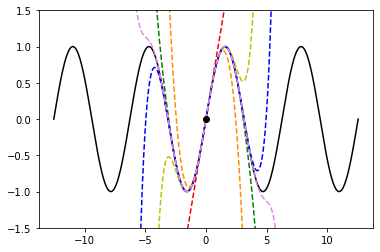

In [ ]:
# example for increasing number of Taylor series terms to show how it affects accuracy

t = np.linspace(-4*np.pi,4*np.pi,1000)
f1 = t
f2 = t - (t**3)/(ma.factorial(3))
f3 = t - (t**3)/(ma.factorial(3)) + (t**5)/(ma.factorial(5))
f4 = t - (t**3)/(ma.factorial(3)) + (t**5)/(ma.factorial(5)) - (t**7)/(ma.factorial(7))
f5 = t - (t**3)/(ma.factorial(3)) + (t**5)/(ma.factorial(5)) - (t**7)/(ma.factorial(7)) + (t**9)/(ma.factorial(9))
f6 = t - (t**3)/(ma.factorial(3)) + (t**5)/(ma.factorial(5)) - (t**7)/(ma.factorial(7)) + (t**9)/(ma.factorial(9)) - (t**11)/(ma.factorial(11))

plt.plot(t,np.sin(t),'k')
plt.plot(t,f1,'r--')
plt.plot(t,f2,color='darkorange',linestyle='--')
plt.plot(t,f3,'y--')
plt.plot(t,f4,'g--')
plt.plot(t,f5,'b--')
plt.plot(t,f6,color='violet',linestyle='--')
plt.plot(0,0,'ok')
plt.ylim(-1.5,1.5)


This form of approximation requires a lot of information about the function, typically more than we know. Therefore we will need to truncate all but one of the differential terms and then iterate the function across a domain.

Let's return to our first order differential, <font size="5"> $\frac{\partial u}{\partial t}$<font size="3"> that we are trying to approximate numerically. Using the definition of the Taylor series expansion given above, and remember that we decided to index time with $n$, the function u(t) can be approximated by:

1. Setting $a$ equal to time $n$, and $t$ equal to time $n+1$ to get expression T1 below, and
2. Setting $a$ equal to time $n$, and $t$ equal to time $n-1$ to get expression T2 below.
    

Show for yourself that these series expansions give:

**T1**:

$\large u_{n+1} = u_n + \Delta t \frac{\partial u}{\partial t} +  \frac{(\Delta t)^2}{2} \frac{\partial ^2 u}{\partial t^2}+  \frac{(\Delta t)^3}{6} \frac{\partial ^3 u}{\partial t^3} + (...)$

**T2**:

$\large u_{n-1} = u_n - \Delta t \frac{\partial u}{\partial t} +  \frac{(\Delta t)^2}{2} \frac{\partial ^2 u}{\partial t^2}-  \frac{(\Delta t)^3}{6} \frac{\partial ^3 u}{\partial t^3} + (...)$

-----------------------

## Finite difference method for first order derivatives (Reaction)

Now looking at expressions T1 and T2 above, you should see that we have some terms that contain differentials ($\frac{\partial u}{\partial t}$, $\frac{\partial ^2 u}{\partial t^2}$, etc), and some terms representing function values at discrete intervals ($u_n$, $u_{n+1}$, etc.). So we are getting closer to finding a discrete representation for our differentials. In this section we will use expressions T1 and T2 to obtain **3 finite difference schemes** for first order differentials.
- Forward Euler, a.k.a. Explicit Euler (this should look very familiar)
- Backward Euler, a.k.a. Implicit Euler
- 1st Order Central method



If we truncate T1 and T2 to remove all terms with differentials higher than first order. :

T1:

$\large u_{n+1} = u_n + \Delta t \frac{\partial u}{\partial t} + O(\Delta t)$


T2:

$\large u_{n-1} = u_n - \Delta t \frac{\partial u}{\partial t} + O(\Delta t)$

\
It is important to note that this introduces a truncation error O($\Delta t$)



If you now rearrange T1 and T2 to solve for the first order differential terms, you will obtain the forward and backward Euler method, respectively:


$\large \frac{\partial u}{\partial t} = \frac{u_{n+1}-u_n}{\Delta t} $    <font size="3"> Forward Euler Method


$\large \frac{\partial u}{\partial t} = \frac{u_{n}-u_{n-1}}{\Delta t} $  <font size="3">Backward Euler Method

Show for yourself, that if you leave the truncation error terms in while rearranging the equation, then as the the step size $\Delta t$ approaches zero so does the truncation error: $\frac{O(\Delta t)}{\Delta t} $.


The Forward and Backward Euler Methods can be visualized as:


<img src="https://drive.google.com/uc?id=1VXwFwERm4EMfgqiGUTEKhd2pkwRPKuW3" width="440"/>

Now that we've seen how the forward and backward Euler method can be derived using Taylor expansions, there is one more finite difference scheme we can derive.




If we reduce T1 by T2 (i.e. take T1 - T2) we obtain the 1st order central difference method, which has a second order truncation error $O(\Delta t^2)$.

<font size="5">
$\frac{\partial u}{\partial t} = \frac{u_{n+1}-u_{n-1}}{2\Delta t} $ <font size="3">    1st Order Central Method



Now we have walked through three different ways you can discretize a first order differential term whenever you encounter it in any equation representing your biological system of interest.

**Important**: Please note that we derived these approaches for a function $u(x,t)$ discretized over time. However, the same schemes also apply for $u(x,t)$ discritized over space, i.e. $\frac{\partial u}{\partial x}$. You would simply replace the time index $n$ by the space index $i$, and the time increment $\Delta t$ with the space increment $\Delta x$.

-----------------------

## Finite difference method for first order derivatives (Reaction) - In practice

  
Solving ODEs: Protein Binding Reaction

Now that we have developed a few numerical schemes for numerical solution let's put them to use, and solve a system of ODEs. In this system protein A binds to receptor B forming protein-receptor complex C. The reaction is reversible and the forward and reverse rate constants are $k_{on}$ and $k_{off}$ respectively.

<img src="https://drive.google.com/uc?export=view&id=1xhmz4ZeMSVvLAzbPi0IKr7uQBNeLmO6X" width="240"/>

We can write a system of ODEs to represent the above reaction:

$\large\frac{d A}{d t} =  k_{off} [C] - k_{on} [A] [B]$

$\large\frac{d B}{d t} =  k_{off} [C] - k_{on} [A] [B]$

$\large\frac{d C}{d t} =  k_{on} [A] [B] - k_{off} [C]$

Note: You can review the Mass Balance Collaboratory notebook for more on how these equations are constructed.
  
To solve these ODEs we rewrite each equation by substituting our Forward Euler Method for the derivatives on the left side of the equations and then rewriting them so that all the future (n+1) concentrations are on the left side of the equation, while all the past (n) terms are on the right side. Putting this in to a loop for iterating through time we have:

**EE1**:

$ A^{n+1} = A^{n} + dt*[koff*C^n - kon*A^n*B^n]$

$ B^{n+1} = B^{n} + dt*[koff*C^n - kon*A^n*B^n]$

$ C^{n+1} = C^{n} + dt*[kon*A^n*B^n - koff*C^n]$


**Extra practice**: To get more comfortable with these approaches, write the analogous relationships using the Backward Euler as well as the 1st order central method. How do they differ?

**Extra, extra practice**: Code all three finite difference methods (forward Euler (given), backward Euler and 1st order central method). How do the results differ for a given time step $\Delta t$?


Now let's bring the mathematics to life by solving them computationally. We first need to define initial condition otherwise our equations are underdetermined with six unknowns($u^{n+1}$ and $u^n$) and three equations. The intial condition gives us a starting point reducing the unknowns to three ($u^{n+1}$) so we can propagate the solution through time.

Given the code below add your equations for $A^{n+1}$, $B^{n+1}$ and $C^{n+1}$ into the for loop which interates from 0 to nt-1 (final time point) and solve!


In [ ]:
nt = 10 #number of time points
Lt = 1 #time the model runs for

# Python function linspace(a,b,c) is used to create a linear array with initial point a, final point b,
# and total number of points,c.
# for example np.linspace(0,10,5) = [0,2.5,5,7.5,10]
t = np.linspace(0,Lt,nt) #the model is solved over the time vector t
dt = Lt/nt # step size through time
kon = 1 #binding rate
koff = 0.001 #dissociation rate

Ca = np.zeros(nt) #initialize concentration A
Cb = np.zeros(nt) #initialize concentration B
Cc = np.zeros(nt) #initialize concentration C

Ca[0] = 1 #initial condition (A starts time with a concentration of 1)
Cb[0] = 5 #initial condition
Cc[0] = 0 #initial condition

# Now we can create the model, we will iterate through time with the index n
# Python for construct iterates integer values from a to b given range(a,b)
for n in range(0,nt-1):
    # Add your equations here

SyntaxError: ignored

Now that you have your solution, let's plot it!

In [ ]:
# Now we are plotting our solution to learn more go to:
# https://matplotlib.org/users/pyplot_tutorial.html
fig = plt.figure(1, figsize = (6,4))
plt.plot(t,Ca,'bo-',label='[A]')
plt.plot(t,Cb,'yo-',label='[B]')
plt.plot(t,Cc,'go-',label='[C]')
plt.title('Forward Euler Method: Simple Reaction')
plt.legend(loc='best')
plt.show()

You should get a figure that looks like this:

<img src="https://drive.google.com/uc?id=12h_2_li4ljo-ITpTCMqu42xcWcAPaF9X" width="440">

It is important to note that the solution is stable for small number of points, however later this will not be the case and we will revisit the subject of stablilty and the importance of selecting the correct numerical scheme.

-----------------------

## Finite difference method for second order derivatives (Diffusion)

As we transition to the next phase, please take a look back at the section above titled "Reactive-diffusive transport". There we introduced the PDE that we need to solve for a system where biological molecules are diffusing and reacting at the same time.

$\frac{\partial C}{\partial t} = D\frac{\partial C^2}{\partial x^2} + R_c$

Up until now we've dealt with how to approximate the first order time derivative ($\frac{\partial C}{\partial t}$) and how to incorporate any reaction terms ($R_c$). In this section we will figure out how to approximate the second order spatial derivative $\frac{\partial C^2}{\partial x^2}$ that describes diffusive mass transport.



For a homogeneous material we can use the Taylor Expansion, or for a nonhomogeneous material we could take the spatial derivative of the 1st order central equation to conserve the change in the diffusivity of the material with respect to space.


As we did for the first order differential above, we will create an expression for the second order derivative by relating T1 and T2, however, this time we want to keep the second order differential and lose the first order differential. Start by writing T1 and T2 in terms of spatial discretization, $\Delta x$ with spatial indices $i$.

**T1**:

$\large u_{i+1} = u_i + \Delta x \frac{\partial u}{\partial x} +  \frac{(\Delta x)^2}{2} \frac{\partial ^2 u}{\partial x^2}+  \frac{(\Delta x)^3}{6} \frac{\partial ^3 u}{\partial x^3} + (...)$

\

**T2**:

$\large u_{i-1} = u_i - \Delta x \frac{\partial u}{\partial x} +  \frac{(\Delta x)^2}{2} \frac{\partial ^2 u}{\partial x^2}-  \frac{(\Delta x)^3}{6} \frac{\partial ^3 u}{\partial x^3} + (...)$

\

Next, as we did before remove all terms with differentials higher than **second** order. We obtain:


**T1**:

$\large u_{i+1} = u_i + \Delta x \frac{\partial u}{\partial x} +  \frac{(\Delta x)^2}{2} \frac{\partial ^2 u}{\partial x^2} +  O(\Delta x^2)$

\

**T2**:

$\large u_{i-1} = u_i - \Delta x \frac{\partial u}{\partial x} +  \frac{(\Delta x)^2}{2} \frac{\partial ^2 u}{\partial x^2} +  O(\Delta x^2)$


Show for yourself, that if we add T1 and T2, and rearrange the terms so that the spatial derivative is on the left side we obtain:

$\large\frac{\partial u^2}{\partial x^2} = \frac{u_{i+1}- 2u_i + u_{i-1}}{\Delta x^2} $
  2nd Order Central Method

So now that we have a way to numerically resolve first and second order differentials, let's ignore reaction for a moment and consider the non-conserverd diffusion equation:

<font size="5">
$\frac{\partial u}{\partial t} = D\frac{\partial^2 u}{\partial x^2} $,<font size="3">
    
   
 where u is the concentration of a diffusible protein, and D is the homogeneous diffusivity coefficient.

We will start with using the Explicit (Forward) Euler Scheme to resolve time and the 2nd Order Central Method to resolve the spatial differential. Substituting the approximations for these two methods into our PDE, we obtain the following finite difference method:

<font size="5">
FDM1: $\frac{u^{n+1}_i-u^n_i}{\Delta t} = D\frac{u^n_{i+1}- 2u^n_i + u^n_{i-1}}{\Delta x^2}$

Note: Make sure that you understand where these substitutions are coming from in preceding parts of this notebook.



-----------------------

## Finite difference method for second order derivatives (Diffusion) - In practice

The algorithm we developed to solve a system of ODEs can be modified to consider two dimensions. The algorithm from the first order derivatives will be used to consider iterations through time, see the stencils below.

<img src="https://drive.google.com/uc?export=view&id=1SRXnkM7g3hn_b-V5v1_i2c7nZ-cbIPe4" width="540"/>

To evaluate the spatial differential we will combine the above stencils with our 2nd Order Central Method for space to get the stencils below. Note that another name for the Forward Euler is the Explicit Euler (EE) and the Backward Euler is known as the Implicit Euler (IE) method.

<img src="https://drive.google.com/uc?export=view&id=1zx-a6feLCEsyWj9vzb5VAFSN38-TI4Is" width="550"/>


<font size="3">
To solve the first order Explicit Euler (EE-1), and second order central method (CM-2) simultaneously, we use the following algorithm:


1) advance time

2) iterate through space

3) repeat

In the diagrams above, this equates to moving up one step, then iterating left to right through space, and repeating.

Begin by rewriting the equation FDM1 so that all the future $n+1$ terms (unknowns) are on the left, and all the past $n$ terms (known) are on the right, to obtain.


    
$ u^{n+1}_i = u^n_i +   \frac{D \Delta t}{\Delta x^2} (u^n_{i+1}- 2u^n_i + u^n_{i-1})    $

Now we need to decide on boundary and initial conditions in order to evaluate the system.

We set our boundary conditions so that there is no flux out of the system. By solving the first point as:

<font size="4">
$ u^{n+1}_i = u^n_i +   \frac{D \Delta t}{\Delta x^2} (u^n_{i+1}- u^n_i )    $

or

<font size="4">
$ u^{n+1}_0 = u^n_0 +   \frac{D \Delta t}{\Delta x^2} (u^n_{1}- u^n_0 )    $

<font size="3">

\

and the last point as:

<font size="4">
    
$ u^{n+1}_i = u^n_i +   \frac{D \Delta t}{\Delta x^2} (-u^n_i + u^n_{i-1})    $

or

<font size="4">

$ u^{n+1}_{nx} = u^n_{nx} +   \frac{D \Delta t}{\Delta x^2} (-u^n_{nx} + u^n_{nx-1})    $

Practice: Show for yourself, how these equations arise from the general one given above.

In the cell below we code the algorithms outlined above for a system where a fixed concentration (1$\mu$M) of our substance $u$ is added in the center of a thin channel of length 10. The code solves the diffusion equation to determine the concentraiton of $u$ at each location along the length of the channel over time.

**Important**: confirm for yourself where each of equations within the for loops come from in the notes above.


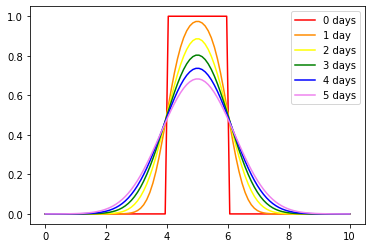

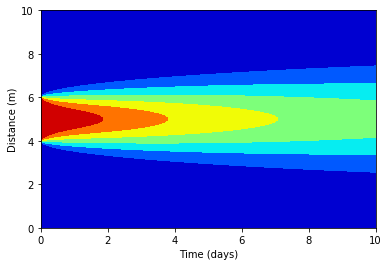

In [ ]:
nx = 100 # number of nodes in space
nt = 10000 # number of nodes in time
Lx = 10 # spatial length of model
Lt = 10 # duration of model
dx = Lx/nx # step size in space
dt = Lt/nt # step size in time
x = np.linspace(0,Lx,nx) # vector for the space the model is solved over
t = np.linspace(0,Lt,nt) # vector for the time the model is solver over

D_sub = 1e-1 # diffusivity of the substrate (constant)

Cu = np.zeros((nx,nt)) # initialize concentration of u
Cu[int(0.4*nx):int(0.6*nx),0] = 1 # inital conditions for u

# iterate through time with n
for n in range(0,nt-1):
#   iterate through space with i
    for i in range(1,nx-2):
#       Boundary Conditions for model
        Cu[0,n+1] = Cu[0,n] + dt*(D_sub*(Cu[0,n]-2*Cu[0,n]+Cu[1,n])/dx**2)
        Cu[nx-1,n+1] = Cu[nx-1,n] + dt*(D_sub*(Cu[nx-2,n]-2*Cu[nx-1,n]+Cu[nx-1,n])/dx**2)
#       iterateing through interior nodes
        Cu[i,n+1] = Cu[i,n] + dt*(D_sub*(Cu[i+1,n]-2*Cu[i,n]+Cu[i-1,n])/dx**2)

# let's plot all of space for days 0,1,2,3,4, and 5
fig = plt.figure(1, figsize = (6,4))
plt.plot(x,Cu[:,0],'red',label='0 days')
plt.plot(x,Cu[:,int(1/Lt*nt)],'darkorange',label='1 day')
plt.plot(x,Cu[:,int(2/Lt*nt)],'yellow',label='2 days')
plt.plot(x,Cu[:,int(3/Lt*nt)],'green',label='3 days')
plt.plot(x,Cu[:,int(4/Lt*nt)],'blue',label='4 days')
plt.plot(x,Cu[:,int(5/Lt*nt)],'violet',label='5 days')
plt.legend(loc='best')
plt.show

# contourf plots are great too
# for more information visit:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html
fig = plt.figure(2, figsize = (6,4))
plt.contourf(t,x,Cu,cmap='jet')
plt.xlabel('Time (days)')
plt.ylabel('Distance (m)')
plt.show()

When developing computational simulations one is always looking for ways to speed up the model without sacrificing accuracy, one way to is vectorize the above model to get rid of the spatial for loop construct. Python syntax may make this tricky, so lets do some simple exercises using vectorized indexing. Let's look at the array A = [1,2,3,4,5], note that in Python the indexing starts at 0 so A[0] = 1 and A[4] = 5.

If we want to select the second to last value INCLUDING THE LAST VALUE we will write: A[1:]

However, if we don't want to include the last term try: A[1:-1] this is all of our interior points.

If we want the first value up to the last point we will write A[:-1]

In [ ]:
A = [1,2,3,4,5];
A[1:],A[1:-1],A[:-1]

([2, 3, 4, 5], [2, 3, 4], [1, 2, 3, 4])


Using vector notation replace the for loop that iterates through space. Instead we define BCs, then calculate the interior nodes with Cu[1:-1,n+1] = ...). Note: for interior nodes think about the first index, what are the values of the neighboring point, what about the last?) How does this effect the outcome?

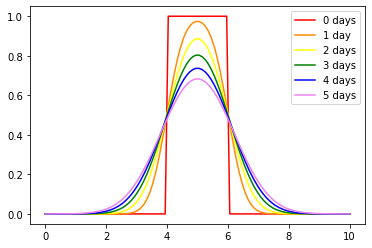

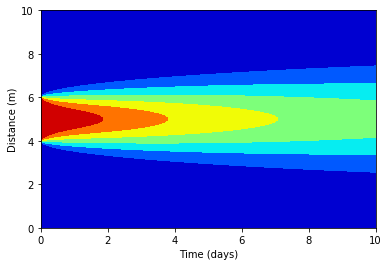

In [ ]:
nx = 100 # number of nodes in space
nt = 10000 # number of nodes in time
Lx = 10 # spatial length of model
Lt = 10 # duration of model
dx = Lx/nx # step size in space
dt = Lt/nt # step size in time
x = np.linspace(0,Lx,nx) # vector for the space the model is solved over
t = np.linspace(0,Lt,nt) # vector for the time the model is solver over

D_sub = 1e-1 # diffusivity of the substrate (constant)

Cu = np.zeros((nx,nt)) # initialize concentration of u
Cu[int(0.4*nx):int(0.6*nx),0] = 1 # inital conditions for u

# We will keep the for construct for time, however we are now getting rid of the loop for space
# in Python vector[0] refers to the first point, while vector[-1] refrences the very last point
for n in range(0,nt-1):
    Cu[0,n+1] = Cu[0,n] + dt*(D_sub*(Cu[0,n]-2*Cu[0,n]+Cu[1,n])/dx**2)
    Cu[-1,n+1] = Cu[nx-1,n] + dt*(D_sub*(Cu[nx-2,n]-2*Cu[nx-1,n]+Cu[nx-1,n])/dx**2)
# to iterate through the spatial points we will start with the first non BC node which is 1 and iterate to the second to last node
# this looks like vector[1:-1]
# what is tricky about this syntax is Python iterates UP TO THE last point but does not include it, for example given:
# A = [1,2,3,4,5]
# A[1:-1] = [2,3,4]
# which is all the interior nodes
# for each of these nodes we need to consider the node to the left, which looks like vector[2:], and the node to the
# right , vector[:-2]. For example:
# A[2:] = [3,4,5]
# A[:-2] = [1,2,3]
# So no our problem looks like:
    Cu[1:-1,n+1] = Cu[1:-1,n] + dt*(D_sub*(Cu[2:,n]-2*Cu[1:-1,n]+Cu[:-2,n])/dx**2)

# let's plot all of space for days 0,1,2,3,4, and 5
fig = plt.figure(1, figsize = (6,4))
plt.plot(x,Cu[:,0],'red',label='0 days')
plt.plot(x,Cu[:,int(1/Lt*nt)],'darkorange',label='1 day')
plt.plot(x,Cu[:,int(2/Lt*nt)],'yellow',label='2 days')
plt.plot(x,Cu[:,int(3/Lt*nt)],'green',label='3 days')
plt.plot(x,Cu[:,int(4/Lt*nt)],'blue',label='4 days')
plt.plot(x,Cu[:,int(5/Lt*nt)],'violet',label='5 days')
plt.legend(loc='best')
plt.show

# contourf plots are great too
# for more information visit:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html
fig = plt.figure(2, figsize = (6,4))
plt.contourf(t,x,Cu,cmap='jet')
plt.xlabel('Time (days)')
plt.ylabel('Distance (m)')
plt.show()


-----------------

## Finite difference method for PDEs - Combining reaction and diffusion

Now that we have looked at reaction and diffusion individually, we have the tools to approach the problem:

<font size="4">
$\frac{\partial u}{\partial t} = (D\frac{\partial u^2}{\partial x^2}) + R_c$

where represents some protein of interest.
    
Let's consider the reaction term to be:

<font size="4">
$\frac{d A}{d t} =  k_{off} [C] - k_{on} [A] [B]$

$\frac{d B}{d t} =  k_{off} [C] - k_{on} [A] [B]$

$\frac{d C}{d t} =  k_{on} [A] [B] - k_{off} [C] - k_{deg}[C]$

<font size='3'>
And A is the only protein that is diffusing.

These equations have been used to model the formation of morphogen (A) gradients through tissue as the morphogens bind to unbound receptors (B). These bound receptors (C) are then often internalized or degraded by the cell.


Combine the numerical reaction (EE1) and diffusion equations (FDM1), and rewrite them so that the unknowns are isolated.


$ A^{n+1}_i = A^{n}_i + \frac{D \Delta t}{\Delta x^2} (A^n_{i+1}- 2A^n_i + A^n_{i-1}) + \Delta t(k_{off}C^n_i - k_{on}A^n_iB^n_i)$

$ B^{n+1}_i = B^{n}_i + \Delta t(k_{off}C^n_i - k_{on}A^n_iB^n_i)$

$ C^{n+1}_i = C^{n}_i + \Delta t(k_{on}A^n_iB^n_i - k_{off}C^n_i - k_{deg}C^n_i)$

In the cell below we code the solution algorithm solving the diffusion and reaction PDE. In this case a fixed concentration (10) of A is added to the center of a thin channel of length 10. The channel is coated with cells that express receptor B, and that internalize and degrade bound receptor complexes C.

**Important**: Make sure you understand what each term in the for loop statements represent (diffusion, binding, degradation etc.).

In [ ]:
nx = 100 # number of nodes in space
nt = 10000 # number of nodes in time
Lx = 10 # spatial length of model
Lt = 10 # duration of model
dx = Lx/nx # step size in space
dt = Lt/nt # step size in time
x = np.linspace(0,Lx,nx) # vector for the space the model is solved over
t = np.linspace(0,Lt,nt) # vector for the time the model is solver over

D_sub = 1e-1 # diffusivity of the substrate (constant)
kon = 1 #binding rate
koff = 0.001 #dissociation rate
kdeg = 0.25 #degradation rate of bound receptor

Ca = np.zeros((nx,nt)) #initialize concentration A
Cb = np.zeros((nx,nt)) #initialize concentration B
Cc = np.zeros((nx,nt)) #initialize concentration C

Ca[int(0.4*nx):int(0.6*nx),0] = 10 # inital conditions for u
Cb[:,0] = 2 #initial condition
Cc[:,0] = 0 #initial condition

# We will keep the for construct for time, however we are now getting rid of the loop for space
# in Python vector[0] refers to the first point, while vector[-1] refrences the very last point
for n in range(0,nt-1):
    Ca[0,n+1] = Ca[0,n] + dt*(D_sub*(Ca[0,n]-2*Ca[0,n]+Ca[1,n])/dx**2) + dt*(koff*Cc[0,n] - kon*Ca[0,n]*Cb[0,n])
    Ca[-1,n+1] = Ca[nx-1,n] + dt*(D_sub*(Ca[nx-2,n]-2*Ca[nx-1,n]+Ca[nx-1,n])/dx**2) + dt*(koff*Cc[nx-1,n] - kon*Ca[nx-1,n]*Cb[nx-1,n])

    Ca[1:-1,n+1] = Ca[1:-1,n] + dt*(D_sub*(Ca[2:,n]-2*Ca[1:-1,n]+Ca[:-2,n])/dx**2) + dt*(koff*Cc[1:-1,n] - kon*Ca[1:-1,n]*Cb[1:-1,n])
    Cb[:,n+1] = Cb[:,n] + dt*(koff*Cc[:,n] - kon*Ca[:,n]*Cb[:,n])
    Cc[:,n+1] = Cc[:,n] + dt*(kon*Ca[:,n]*Cb[:,n] - koff*Cc[:,n] - kdeg*Cc[:,n])


# let's plot all of space for days 0,1,2,3,4, and 5
fig = plt.figure(1, figsize = (12,4))
plt.subplot(121)
plt.plot(x,Ca[:,0],'red',label='0 days')
plt.plot(x,Ca[:,int(1/Lt*nt)],'darkorange',label='1 day')
plt.plot(x,Ca[:,int(2/Lt*nt)],'yellow',label='2 days')
plt.plot(x,Ca[:,int(3/Lt*nt)],'green',label='3 days')
plt.plot(x,Ca[:,int(4/Lt*nt)],'blue',label='4 days')
plt.plot(x,Ca[:,int(5/Lt*nt)],'violet',label='5 days')
plt.title('Morphogen (A)')
plt.legend(loc='best')
plt.subplot(122)
plt.plot(x,Cb[:,0],'red',label='0 days')
plt.plot(x,Cb[:,int(1/Lt*nt)],'darkorange',label='1 day')
plt.plot(x,Cb[:,int(2/Lt*nt)],'yellow',label='2 days')
plt.plot(x,Cb[:,int(3/Lt*nt)],'green',label='3 days')
plt.plot(x,Cb[:,int(4/Lt*nt)],'blue',label='4 days')
plt.plot(x,Cb[:,int(5/Lt*nt)],'violet',label='5 days')
plt.title('Unbound Receptor (B)')
plt.legend(loc='best')
plt.show



# contourf plots are great too
# for more information visit:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html
fig = plt.figure(2, figsize = (12,4))
plt.subplot(121)
plt.contourf(t,x,Cc,cmap='jet')
plt.xlabel('Time (days)')
plt.ylabel('Distance (m)')
plt.subplot(122)
plt.plot(x,Cc[:,0],'red',label='0 days')
plt.plot(x,Cc[:,int(1/Lt*nt)],'darkorange',label='1 day')
plt.plot(x,Cc[:,int(2/Lt*nt)],'yellow',label='2 days')
plt.plot(x,Cc[:,int(3/Lt*nt)],'green',label='3 days')
plt.plot(x,Cc[:,int(4/Lt*nt)],'blue',label='4 days')
plt.plot(x,Cc[:,int(5/Lt*nt)],'violet',label='5 days')
plt.title('Complex (C)')
plt.legend(loc='best')


NameError: ignored

------------
## Further tools to accelerate computation of finite difference methods

In this final section, we return to the example code that tracks diffusion in the absence of reaction in order to illustrate some further strategies for simplifying and accelerating computation of finite difference schemes. Our previous approach of vector indexing made the code way quicker! But you have may noticed how we rearranged the equations so that the unknowns and knowns were on opposite sides of the equation, and that we can easily use linear algebra and matrix manipulation to solve the system:


<font size="5">
    
[A]{$u^{n+1}$} = [B]{$u^n$},

<font size="3"> where [A] and [B] are operator matrices derived from the diffusion equation, see figure below.

For the EE-1,CM-2:

The spatial operator B is a tridiagonal matrix of size nx by nx, the diagonals are defined as $b_{i-1}$, $b_i$, and  $b_{i+1}$.
While the operator A is a monodiagonal matrix of size nx by nx, the diagonals are defined as $a_i$, see figure below

<img src="https://drive.google.com/uc?export=view&id=1Y3e1iFBxHUIeCaLGQvlYMKyjnojquDRB"/>

Matrix A and B can are derived from the numerical stencil that we previously solved. Now lets look at the right side panel below. This should look familiar, because this is what we have been solving above. We just need to rewrite it into the form<font size="5">
[A]{$u^{n+1}$} = [B]{$u^n$}, <font size="3">.

Start by rewriting the numerical diffusion in the left panel in terms of the unknowns on the left side and the known on the right. Next isolate each of the index function to its own term, see the last line in the right panel. Each term represents a diagnonal.

<img src="https://drive.google.com/uc?export=view&id=1WulZBlvyLnOp16cSWDcdJEa-R4UAWOXg"/>

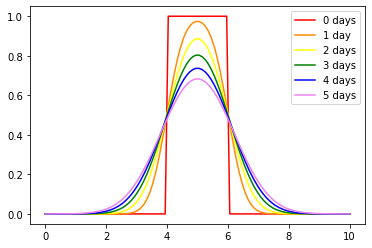

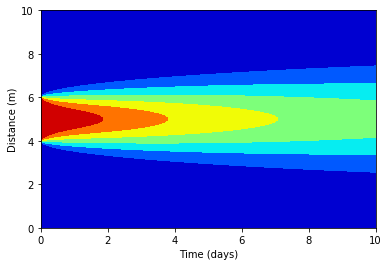

Text(0.5, 1.05, 'spy of Matrix B')

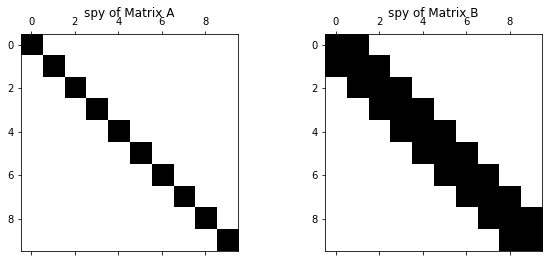

In [ ]:
nx = 100 # number of nodes in space
nt = 10000 # number of nodes in time
Lx = 10 # spatial length of model
Lt = 10 # duration of model
dx = Lx/nx # step size in space
dt = Lt/nt # step size in time
x = np.linspace(0,Lx,nx) # vector for the space the model is solved over
t = np.linspace(0,Lt,nt) # vector for the time the model is solver over

D_sub = 1e-1 # diffusivity of the substrate (constant)

Cu = np.zeros((nx,nt)) # initialize concentration of u
Cu[int(0.4*nx):int(0.6*nx),0] = 1 # inital conditions for u

sig_R = np.zeros(nx) # right diagonal for [B]
sig_L = np.zeros(nx) # left diagonal for [B]
sig_C = np.zeros(nx) # central diagonal for [B]

A = np.zeros((nx,nx)) # initialize A
B = np.zeros((nx,nx)) # initialize B

Cu_past = np.zeros((nx,nt)) #inital array for known terms, right side of the equation or B*C^n

# interior nodes
sig_R[1:] = (dt/dx**2)*D_sub
sig_C[1:-1] = 1 - 2*(dt/dx**2)*D_sub
sig_L[:-1] = (dt/dx**2)*D_sub
# boundary conditions
sig_C[0] = 1 -(dt/dx**2)*D_sub
sig_C[-1] = 1 -(dt/dx**2)*D_sub


# to build A and B we can use Pythons diag function
# np.diag(a,b) vector a is diagonalized into an matix of the len(a)X len(a)
# each diagonal is offset by b, so for the central diagonal b=0, for right b=1, for left b = -1
A = np.diag(np.ones(nx),0)
B = np.diag(sig_L[:-1],-1) + np.diag(sig_C[:],0) + np.diag(sig_R[1:],1)

# now we iterate through time with index n
for n in range(0,nt-1):
#   we take the dot product of B*Cu^n using Python dot function
    Cu_past = B.dot(Cu[:,n])
#   we solve the equation [A]u^n+1 = Cu_past by inverting A on both sides
#   this is done with the Python linalg.solve
    Cu[:,n+1] = np.linalg.solve(A,Cu_past)



# let's plot all of space for days 0,1,2,3,4, and 5
fig = plt.figure(1, figsize = (6,4))
plt.plot(x,Cu[:,0],'red',label='0 days')
plt.plot(x,Cu[:,int(1/Lt*nt)],'darkorange',label='1 day')
plt.plot(x,Cu[:,int(2/Lt*nt)],'yellow',label='2 days')
plt.plot(x,Cu[:,int(3/Lt*nt)],'green',label='3 days')
plt.plot(x,Cu[:,int(4/Lt*nt)],'blue',label='4 days')
plt.plot(x,Cu[:,int(5/Lt*nt)],'violet',label='5 days')
plt.legend(loc='best')
plt.show

# contourf plots are great too
# for more information visit:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html
fig = plt.figure(2, figsize = (6,4))
plt.contourf(t,x,Cu,cmap='jet')
plt.xlabel('Time (days)')
plt.ylabel('Distance (m)')
plt.show()

# We can look at our opperator space by splotting the spy, every block that is black contains
# a value while white is empty
fig = plt.figure(3, figsize = (10,4))
plt.subplot(121)
plt.spy(A[0:10,0:10])
plt.title('spy of Matrix A')
plt.subplot(122)
plt.spy(B[0:10,0:10])
plt.title('spy of Matrix B')

Linear algebra also allows us to solve diffusion implicitly, by solving for the spatial differential in the future and solve simultaneously for all future points. This makes the solution unconditionaly stable!

Unknown
<span style="color:green">
Known
    
<span style="color:green">
$ \frac{-D \Delta t}{\Delta x^2}$
<span style="color:red">
$u^{n+1}_{i+1}$
<span style="color:black">
+
<span style="color:green">
$(1 + 2 \frac{D \Delta t}{\Delta x^2})$
<span style="color:red">
$u^{n+1}_{i} $
<span style="color:black">
+
<span style="color:green">
$\frac{-D \Delta t}{\Delta x^2}$
<span style="color:red">
$u^{n+1}_{i-1} $
<span style="color:black">
=
<span style="color:green">
$u^n_i    $

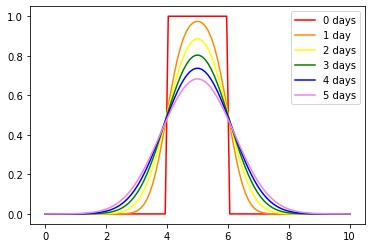

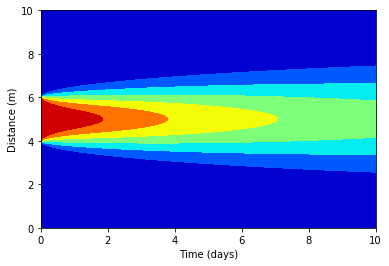

Text(0.5, 1.05, 'spy of Matrix B')

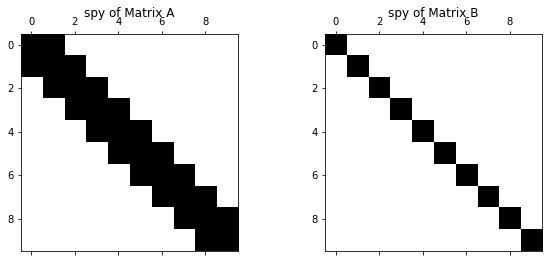

In [ ]:
# =============================================================================
# Uniform Mesh
# =============================================================================
nx = 100
nt = 10000
Lx = 10
Lt = 10
dx = Lx/nx
dt = Lt/nt
D_sub = 1e-1
r_a0 = 1
r_b0 = 1
x = np.linspace(0,Lx,nx)
t = np.linspace(0,Lt,nt)

Ca = np.zeros((nx,nt))
Cb = np.zeros((nx,nt))
D = np.zeros(nx)

sig_R = np.zeros(nx)
sig_L = np.zeros(nx)
sig_C = np.zeros(nx)

A = np.zeros((nx,nx))
B = np.zeros((nx,nx))

Ca_past = np.zeros((nx,nt))
Cb_past = np.zeros((nx,nt))





D[:] = D_sub
Ca[int(0.4*nx):int(0.6*nx),0] = r_a0

Ca[0] = 0
Ca[nx-1] = 0
Cb[0] = 0
Cb[nx-1] = 0



# interior nodes
sig_R[1:] = -(dt/dx**2)*D_sub
sig_C[1:-1] = 1 + 2*(dt/dx**2)*D_sub
sig_L[:-1] = -(dt/dx**2)*D_sub
# boundary conditions
sig_C[0] = 1 +(dt/dx**2)*D_sub
sig_C[-1] = 1 +(dt/dx**2)*D_sub


B = np.diag(np.ones(nx),0)
A = np.diag(sig_L[:-1],-1) + np.diag(sig_C[:],0) + np.diag(sig_L[1:],1)


for n in range(0,nt-1):
    Ca_past = B.dot(Ca[:,n])
    Ca[:,n+1] = np.linalg.solve(A,Ca_past)




# let's plot all of space for days 0,1,2,3,4, and 5
fig = plt.figure(1, figsize = (6,4))
plt.plot(x,Ca[:,0],'red',label='0 days')
plt.plot(x,Ca[:,int(1/Lt*nt)],'darkorange',label='1 day')
plt.plot(x,Ca[:,int(2/Lt*nt)],'yellow',label='2 days')
plt.plot(x,Ca[:,int(3/Lt*nt)],'green',label='3 days')
plt.plot(x,Ca[:,int(4/Lt*nt)],'blue',label='4 days')
plt.plot(x,Ca[:,int(5/Lt*nt)],'violet',label='5 days')
plt.legend(loc='best')
plt.show

# contourf plots are great too
# for more information visit:
# https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html
fig = plt.figure(2, figsize = (6,4))
plt.contourf(t,x,Ca,cmap='jet')
plt.xlabel('Time (days)')
plt.ylabel('Distance (m)')
plt.show()

# We can look at our opperator space by splotting the spy, every block that is black contains
# a value while white is empty
fig = plt.figure(3, figsize = (10,4))
plt.subplot(121)
plt.spy(A[0:10,0:10])
plt.title('spy of Matrix A')
plt.subplot(122)
plt.spy(B[0:10,0:10])
plt.title('spy of Matrix B')

# Appendix: Stability Analysis: Von Neumann Stability Analysis
    
**Note**: This section provides additional information for numerical solution of PDEs. It will **not** be included in exams or projects. However, if you see unexpected oscilations, discontinuities, negative values or solver errors in your results this could be a good resource for troubleshooting.

\

Von Neumann Stability Analysis can be used to evaluate the error introduced by truncations of the Taylor expansion discussed earlier. The conclusion of the stability analysis is that stability is maintained when:

$\frac{D \Delta t}{\Delta x^2} <= \frac{1}{2}$

This is true for forward schemes, but not backward schemes which when resolved implicitly. So let's examine how different schemes for evaluating time changes the stability of the solution. We will compare Explicit Euler, Runge Kutta 4th order, Implicit Euler, and a time integration with ODEint a built in solver in Python.

Run the code below for varying nt, and subsequently varying dt.

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar 26 11:10:17 2019

@author: pgiol
"""

import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
import scipy.sparse.linalg
from scipy import sparse
from scipy.integrate import odeint

# =============================================================================
# Uniform Mesh
# =============================================================================
nx = 100
nt = 143
#nt = 200

Lx = 10
Lt = 10

dx = Lx/nx
dt = Lt/nt

D_sub = 1e-1
r_a0 = 1
r_b0 = 1


x = np.linspace(0,Lx,nx)
t = np.linspace(0,Lt,nt)

Ca = np.zeros((nx,nt))
Cb = np.zeros((nx,nt))
D = np.zeros(nx)
Analytic = np.zeros((nx,nt))

sig_R = np.zeros(nx)
sig_L = np.zeros(nx)
sig_C = np.zeros(nx)

A = np.zeros((nx,nx))
B = np.zeros((nx,nx))

Ca_past = np.zeros((nx))
Cb_past = np.zeros((nx))
k1 = np.zeros((nx))
k2 = np.zeros((nx))
k3 = np.zeros((nx))
k4 = np.zeros((nx))


D[:] = D_sub
Ca[int(0.4*nx):int(0.6*nx),0] = r_a0

Ca[0] = 0
Ca[nx-1] = 0
Cb[0] = 0
Cb[nx-1] = 0




def TimeEE(x,t,Ca,Cb,D):

    for n in range(0,nt-1):
        h = 1
        Ca_n = Ca[:,n]
        Ca_past,B = Space(x,t,Ca_n,Cb,D,n,h)
        A = np.diag(np.ones(nx),0)
        Ca_past = (Ca_past * dt ) + A.dot(Ca[:,n])
        Ca[:,n+1] = np.linalg.solve(A,Ca_past)
    return(Ca,B)

def TimeIE(x,t,Ca,Cb,D):
    for n in range(0,nt-1):
        h = 1
        Ca_n = Ca[:,n]
        Ca_past,A = Space(x,t,Ca_n,Cb,D,n,h)
        B = np.diag(np.ones(nx),0)
        Ca_past = B.dot(Ca[:,n])
        A = (-dt*A+B)
        Ca[:,n+1] = np.linalg.solve((A),Ca_past)
    return(Ca,B,A)

def TimeRK4(x,t,Ca,Cb,D):
    for n in range(0,nt-1):
        h = 1
        Ca1 = Ca[:,n]
        k1,B = Space(x,t,Ca1,Cb,D,n,h)
        Ca2 = Ca[:,n] + dt*0.5*k1[:]
        k2,B = Space(x,t,Ca2,Cb,D,n,h)
        Ca3 = Ca[:,n] + dt*0.5*k2[:]
        k3,B = Space(x,t,Ca3,Cb,D,n,h)
        h=1
        Ca4 = Ca[:,n] + dt*k3[:]
        k4,B = Space(x,t,Ca4,Cb,D,n,h)
        Ca[:,n+1] = Ca[:,n] + dt*(k1/6+k2/3+k3/3+k4/6)
    return(Ca,B)

def Space(x,t,Ca_n,Cb,D,n,h):
    sig_R[1:] = h*(1/dx**2)*D[1:]
    sig_C[1:-1] = - h*2*(1/dx**2)*D[1:-1]
    sig_L[:-1] = h*(1/dx**2)*D[:-1]
    sig_C[0] = - h*1*(1/dx**2)*D[0]
    sig_C[-1] = - h*1*(1/dx**2)*D[-1]
    B = np.diag(sig_L[:-1],-1) + np.diag(sig_C[:],0) + np.diag(sig_R[1:],1)
    B = B
    Ca_past = B.dot(Ca_n)
    return(Ca_past,B)

def odefunc(F, t):
    dFdt = np.zeros(nx)
    dFdt[0] = 0
    dFdt[-1] = 0
    dFdt[1:-1] = D_sub/dx**2*(F[:-2]-2*F[1:-1]+F[2:])
    return dFdt

init = Ca[:,0]
Stab = (D_sub*dt)/(dx**2)
sol = odeint(odefunc, init, t)
solT = np.transpose(sol)

CaRK,B = TimeRK4(x,t,Ca,Cb,D)

Ca = np.zeros((nx,nt))
Ca[int(0.4*nx):int(0.6*nx),0] = r_a0
Ca[0] = 0
Ca[nx-1] = 0
CaEE,B = TimeEE(x,t,Ca,Cb,D)

Ca = np.zeros((nx,nt))
Ca[int(0.4*nx):int(0.6*nx),0] = r_a0
Ca[0] = 0
Ca[nx-1] = 0
CaIE,B,A = TimeIE(x,t,Ca,Cb,D)

<function matplotlib.pyplot.show>

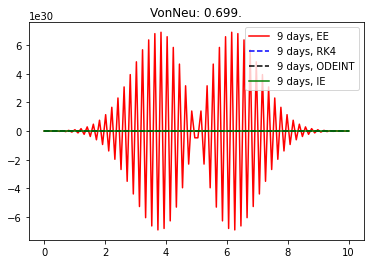

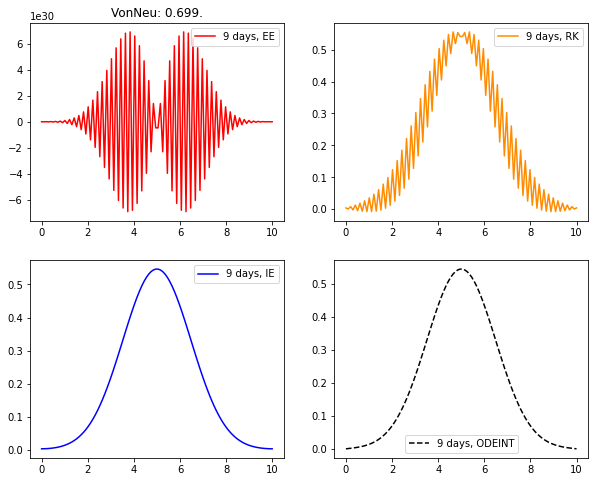

In [ ]:
fig = plt.figure(1, figsize = (6,4))
plt.title(f'VonNeu: {Stab:.3f}.')
plt.plot(x,CaEE[:,int(0.9*nt)],'r',label='9 days, EE')
plt.plot(x,CaRK[:,int(0.9*nt)],'b--',label='9 days, RK4')
plt.plot(x,solT[:,int(0.9*nt)],'k--',label='9 days, ODEINT')
plt.plot(x,CaIE[:,int(0.9*nt)],'g',label='9 days, IE')
plt.legend(loc='best')
plt.show



fig = plt.figure(2, figsize = (10,8))
plt.subplot(221)
plt.title(f'VonNeu: {Stab:.3f}.')
plt.plot(x,CaEE[:,int(0.9*nt)],'r',label='9 days, EE')
plt.legend(loc='best')
plt.subplot(222)
plt.plot(x,CaRK[:,int(0.9*nt)],'darkorange',label='9 days, RK')
plt.legend(loc='best')
plt.subplot(224)
plt.plot(x,solT[:,int(0.9*nt)],'k--',label='9 days, ODEINT')
plt.legend(loc='best')
plt.subplot(223)
plt.plot(x,CaIE[:,int(0.9*nt)],'b',label='9 days, IE')
plt.legend(loc='best')

plt.show




You will see that any Von Neumann value over 1/2 will crash the EE solver, and the RK4 solver will hold crash if the value increases past 7/10. Meanwhile the IE solver never crashes, which is why implicit solvers are favored so greatly. However, it is importatant to also consider accuracy and that having a piece of software that always spits out a solution is not always great, because accuracy and stability are not synonymous.

Consider nt = 5:

<function matplotlib.pyplot.show>

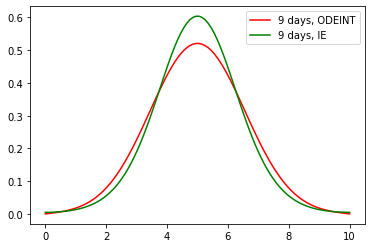

In [ ]:
nt = 5
Lt = 10
dt = Lt/nt

t = np.linspace(0,Lt,nt)

Ca = np.zeros((nx,nt))
Ca[int(0.4*nx):int(0.6*nx),0] = r_a0
Ca[0] = 0
Ca[nx-1] = 0
CaIE,B,A = TimeIE(x,t,Ca,Cb,D)


sol = odeint(odefunc, init, t)
solT = np.transpose(sol)



fig = plt.figure(4, figsize = (6,4))
plt.plot(x,solT[:,-1],'r',label='9 days, ODEINT')
plt.plot(x,CaIE[:,-1],'g',label='9 days, IE')

plt.legend(loc='best')
plt.show


Despite producing a solution the implicit solution produces an erroneous solution. It is important to not only have full control over your mathematical/computation model, but to have a deeper understanding of your model.

<font size="5">
2D Solvers
<font size="3">

t=: 0.0


/usr/local/lib/python3.6/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


t=: 10.0
t=: 20.0
t=: 30.0
t=: 40.0
t=: 50.0
t=: 60.0
t=: 70.0
t=: 80.0
t=: 90.0


Text(0.5, 1.05, 'spy of Matrix B')

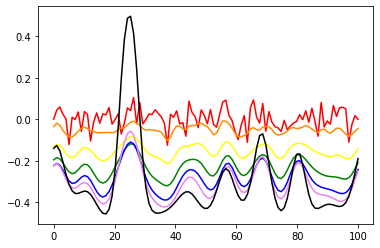

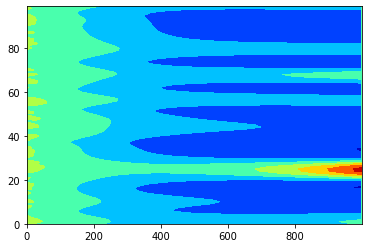

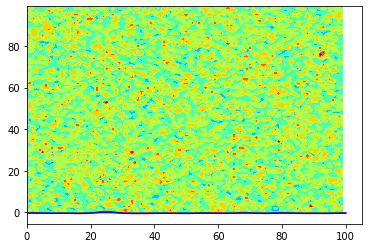

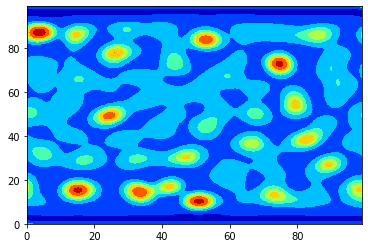

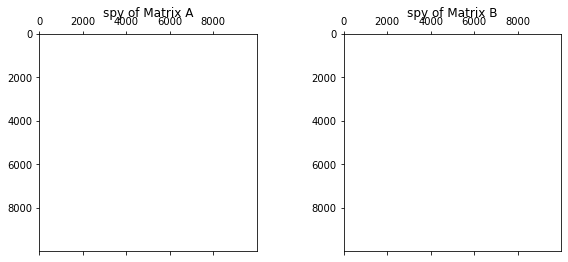

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tue Mar 26 11:10:17 2019

@author: pgiol
"""

import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse
import scipy.sparse.linalg
from scipy import sparse

# =============================================================================
# Uniform Mesh
# =============================================================================
nx = 100
ny = 100
nt = 1000

Lx = 100
Ly = 100
Lt = 15

dx = Lx/nx
dy = Ly/ny
dt = Lt/nt

Da0 = 1
Db0 = 100
Ca0 = 0.1
Cb0 = 0.5
alpha = -0.005 *10
beta = 10

x = np.linspace(0,Lx,nx)
y = np.linspace(0,Lx,nx)
t = np.linspace(0,Lt,nt)

Ca = np.zeros((ny,nx,nt))
Cb = np.zeros((ny,nx,nt))
Da = np.zeros((ny,nx))
Db = np.zeros((ny,nx))

sig_R = np.zeros(nx*ny)
sig_L = np.zeros(nx*ny)
sig_C = np.zeros(nx*ny)
sig_D = np.zeros(nx*ny)
sig_U = np.zeros(nx*ny)

A = np.zeros((nx*ny,nx*ny))
B = np.zeros((nx*ny,nx*ny))

Ca_past = np.zeros((ny,nx,nt))
Cb_past = np.zeros((ny,nx,nt))

Ca_1D = np.zeros((ny*nx,nt))
Cb_1D = np.zeros((ny*nx,nt))
Da_1D = np.zeros((ny*nx))
Db_1D = np.zeros((ny*nx))
Ca_past_1D = np.zeros((ny*nx,nt))
Cb_past_1D = np.zeros((ny*nx,nt))


Da[:,:] = Da0
Db[:,:] = Db0

#Ca[int(0.4*nx):int(0.6*nx),0] = Ca0
#Cb[int(0.4*nx):int(0.6*nx),0] = Cb0
Ca[:,:,0] = np.random.normal(loc=0,scale=0.05,size=(ny,nx))
Cb[:,:,0] = np.random.normal(loc=0,scale=0.05,size=(ny,nx))


Ca[0,:] = 0
Ca[nx-1,:] = 0
Ca[:,0] = 0
Ca[:,nx-1] = 0
Cb[0,:] = 0
Cb[nx-1,:] = 0
Cb[:,0] = 0
Cb[:,nx-1] = 0


# =============================================================================
# Map 2 spatial dimensions into 1 (k = nx*j + i)
# =============================================================================
for j in range(0,ny):
    for i in range(0,nx):
        k = (nx*j)+(i)

        Ca_1D[int(k),0] = Ca[j,i,0]
        Cb_1D[int(k),0] = Cb[j,i,0]
        Ca_past_1D[int(k),0] = Ca_past[j,i,0]
        Cb_past_1D[int(k),0] = Cb_past[j,i,0]
        Da_1D[int(k)] = Da[j,i]
        Db_1D[int(k)] = Db[j,i]


for n in range(0,nt-1):
    count = (n/(100))-round(n/(100));
    if count == 0:
        print('t=:',n/10)

    #Ca[n+1] = Ca[n] + dt*(Ca[n]-Ca[n]**3-Cb[n]+alpha)
    #Cb[n+1] = Cb[n] + dt*((Ca[n] - Cb[n])*beta)
    sig_U[:] = -(dt/dx**2)*Da_1D[:]
    sig_D[:] = -(dt/dx**2)*Da_1D[:]
    sig_R[:] = -(dt/dx**2)*Da_1D[:]
    sig_C[:] = 1 + 4*(dt/dx**2)*Da_1D[:]
    sig_L[:] = -(dt/dx**2)*Da_1D[:]

    #Aa = np.diag(sig_C[:],0) + np.diag(sig_R[1:],1) + np.diag(-sig_L[:-1],-1) + np.diag(-sig_D[nx:],nx) + np.diag(-sig_U[:-nx],-nx)
    #Ba = np.diag(np.ones(nx*ny),0)
    Aa = sparse.spdiags([sig_C[:],sig_R[:],sig_L[:],sig_U[:],sig_D[:]],[0,1,-1,-nx,nx],nx*ny,ny*nx)
    Ba = sparse.spdiags([np.ones(nx*ny)],[0],nx*ny,nx*ny)

    sig_U[:] = -(dt/dx**2)*Db_1D[:]
    sig_D[:] = -(dt/dx**2)*Db_1D[:]
    sig_R[:] = -(dt/dx**2)*Db_1D[:]
    sig_C[:] = 1 + 4*(dt/dx**2)*Db_1D[:]
    sig_L[:] = -(dt/dx**2)*Db_1D[:]

    #Ab = np.diag(sig_C[:],0) + np.diag(sig_R[1:],1) + np.diag(-sig_L[:-1],-1) + np.diag(-sig_D[nx:],nx) + np.diag(-sig_U[:-nx],-nx)
    #Bb = np.diag(np.ones(nx*ny),0)
    Ab = sparse.spdiags([sig_C[:],sig_R[:],sig_L[:],sig_U[:],sig_D[:]],[0,1,-1,-nx,nx],nx*ny,ny*nx)
    Bb = sparse.spdiags([np.ones(nx*ny)],[0],nx*ny,nx*ny)


    Ca_past_1D[:,n] = Ba.dot(Ca_1D[:,n])
    Cb_past_1D[:,n] = Bb.dot(Cb_1D[:,n])

    Ca_1D[:,n+1] = scipy.sparse.linalg.spsolve(Aa,Ca_past_1D[:,n]) + dt*(Ca_1D[:,n]-Ca_1D[:,n]**3-Cb_1D[:,n]+alpha)
    Cb_1D[:,n+1] = scipy.sparse.linalg.spsolve(Ab,Cb_past_1D[:,n]) + dt*((Ca_1D[:,n] - Cb_1D[:,n])*beta)


for t in range(0,nt-1):
    for j in range(0,ny):
        for i in range(0,nx):
            k = (ny*j)+(i)

            Ca[j,i,t] =  Ca_1D[int(k),t]
            Cb[j,i,t] = Cb_1D[int(k),t]
            Ca_past[j,i,t] = Ca_past_1D[int(k),t]
            Cb_past[j,i,t] = Cb_past_1D[int(k),t]
            Da[j,i] = Da_1D[int(k)]
            Db[j,i] = Db_1D[int(k)]




fig = plt.figure(1, figsize = (6,4))
plt.plot(x,Ca[int(ny*0.5),:,0],'red')
plt.plot(x,Ca[int(ny*0.5),:,int(1/Lt*nt)],'darkorange')
plt.plot(x,Ca[int(ny*0.5),:,int(3/Lt*nt)],'yellow')
plt.plot(x,Ca[int(ny*0.5),:,int(5/Lt*nt)],'green')
plt.plot(x,Ca[int(ny*0.5),:,int(7/Lt*nt)],'blue')
plt.plot(x,Ca[int(ny*0.5),:,int(9/Lt*nt)],'violet')
plt.plot(x,Ca[int(ny*0.5),:,-2],'black')


fig = plt.figure(2, figsize = (6,4))
plt.contourf(Ca[int(ny*0.5),:,:],cmap='jet')


fig = plt.figure(3, figsize = (6,4))
plt.plot(x,Ca[int(ny*0.5),:,-2],'red')
plt.plot(x,Cb[int(ny*0.5),:,-2],'blue')


fig = plt.figure(3, figsize = (6,4))
plt.contourf(Ca[:,:,0],cmap='jet')

fig = plt.figure(4, figsize = (6,4))
plt.contourf(Ca[:,:,-2],cmap='jet')







fig = plt.figure(5, figsize = (10,4))
plt.subplot(121)
plt.spy(A)
plt.title('spy of Matrix A')
plt.subplot(122)
plt.spy(B)
plt.title('spy of Matrix B')


In [ ]:
  # -*- coding: utf-8 -*-
"""
Created on Sun Jul 21 11:52:29 2019

@author: PatGio
"""

# -*- coding: utf-8 -*-
"""
Created on Wed Apr 24 12:18:37 2019

@author: pgiol
"""

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import math as ma
import scipy.sparse
import scipy.sparse.linalg
from scipy import sparse



def InterFlow(n, nt, U_1D, dt, dx, rho, nu, U0,c):

    Uold_1D = np.zeros(nx)
    Ustar_1D = np.zeros(nx)

    A = np.zeros((nx,nx))
    B = np.zeros((nx,nx))
    A1 = np.zeros((nx,nx))
    A2 = np.zeros((nx,nx))
    A11 = np.zeros((nx,nx))
    A22 = np.zeros((nx,nx))
    C = np.zeros((nx,nx))
    sig_L = np.zeros((nx))
    sig_R = np.zeros((nx))
    sig_C = np.zeros((nx))
    Uoldold_1D = U_1D[:,n-1].copy()
    Uold_1D = U_1D[:,n].copy()
# =============================================================================
#   Convective Flow
# =============================================================================

    sig_R[1:(nx)] = (1)*c* (Uold_1D[:(nx-1)] *(dt/(2*dx)) )
    sig_L[0:(nx-2)] = -(1)*c*(Uold_1D[1:(nx-1)] *(dt/(2*dx)) )
    sig_C[0] = -(1)*c*(Uold_1D[0] *(dt/(1*dx)) )
    sig_R[1] = (1)*c*(Uold_1D[0] *(dt/(1*dx)) )
#    sig_C[0:nx-1] = 1 + (2/3)*c* (Uold_1D[:(nx-1)] *(dt/(dx)) )
#    sig_R[2] =(2/3)* (Uold_1D[1] *(dt/(dx)))
#    sig_C[1] =(2/3)* -(Uold_1D[1] *(dt/(dx)))
#    sig_L[nx-2] =(2/3)* -(Uold_1D[nx-2] *(dt/(dx)))
#    sig_C[nx-1] =(2/3)* (Uold_1D[nx-1] *(dt/(dx)))
    sig_C[-1] = 1

    A1 = sparse.spdiags([sig_C[:],sig_R[:],sig_L[:]],[0,1,-1],nx,nx)
    A11 = np.diag(sig_C[:],0) + np.diag(sig_R[1:],1) +  np.diag(sig_L[:-1],-1)

# =============================================================================
#   Diffusive Viscous Flow
# =============================================================================
    sig_L = np.zeros((nx))
    sig_R = np.zeros((nx))
    sig_C = np.zeros((nx))

    sig_R[1:nx] =   (2/3)*nu*(dt/(dx)**2)
    sig_L[0:nx-1] = (2/3)*nu*(dt/(dx)**2)

#    sig_C[1:nx-1] = 1 + sig_L[2:nx]+sig_R[0:nx-2]
    sig_C[:] = 1 + sig_L[:]+sig_R[:]
    sig_C[0] = 1 + sig_R[1]
    sig_C[-1] = 1 + sig_L[-2]

    A2 = sparse.spdiags([sig_C[:],-sig_R[:],-sig_L[:]],[0,1,-1],nx,nx)
    A22 = np.diag(sig_C[:],0) + np.diag(-sig_R[1:],1) + np.diag(-sig_L[:-1],-1)


    A = (A1+A2)
    B = sparse.spdiags([(4/3)*np.ones(nx)],[0],nx,nx)
    C = sparse.spdiags([(1/3)*np.ones(nx)],[0],nx,nx)

    Upast = np.zeros((nx))
    Upast = (B.dot(Uold_1D[:]))-(C.dot(Uoldold_1D[:]))
    Ustar_1D[:] = scipy.sparse.linalg.spsolve(A, Upast)
    Ustar_1D[-1] = 0
    Ustar_1D[0] = 0

    return Ustar_1D,A11,A22

def NSmodel(nt, U_1D, dt, dx, rho, nu, x, U0,c):
    base = 0.1
    slope=0.5
    U_1D[:,0] = np.exp(-np.power(x - 5, 2.) / (2 * np.power(1, 2.))) #U0 - ((U0-base)/(1+10**(-slope*(x[:]-0)))+base)
    U_1D[:,1] = np.exp(-np.power(x - 5, 2.) / (2 * np.power(1, 2.)))        #U0 - ((U0-base)/(1+10**(-slope*(x[:]-0)))+base)

#   solution begins iterating
    for n in range(1,nt-1):
#       counter so we know the code didn't crash
        count = (n/100)-round(n/100);
        if count == 0:
            print('t=:',n)

        U_1D[:,n+1],A11,A22 = InterFlow(n, nt, U_1D, dt, dx, rho, nu, U0,c)

    return U_1D,A11,A22

Lx = 20
Lt = 100

nx = 100
nt = 500

ntt = 50
Ntt = 100
dx = Lx/nx
dt = Lt/nt

x = np.linspace(0,Lx,nx)
t = np.linspace(0,Lt,nt)

c = 1

Re = 50              # range from 10s to 100s
U0 = 2          # initial velocity at the start
rho = 1              # density
nu = ((dx*Lx)*U0)/Re  # viscosity (UL/Re, Re = UL/nu, original value: 0.1)
A0 = 1
B0 = 1

Re = 100

U_1D = np.zeros((nx,nt))

U_1D,A11,A22 = NSmodel(nt, U_1D, dt, dx, rho, nu, x, U0,c)

Ufinal = U_1D



t=: 100
t=: 200
t=: 300
t=: 400


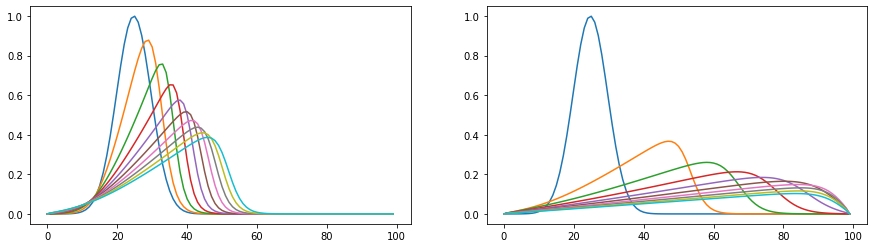

In [ ]:
fig = plt.figure(1, figsize=(15,4))
plt.subplot(121)
plt.plot(Ufinal[:,0:50:5]);
plt.subplot(122)
plt.plot(Ufinal[:,0:500:50]);

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Wed Apr 24 12:18:37 2019

@author: pgiol
"""

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
import math as ma


import scipy.sparse
import scipy.sparse.linalg
from scipy import sparse



def InterFlow(n, nt, U_1D, V_1D, dt, dx, dy, rho, nu, U0):


    Uold_1D = np.zeros((ny*nx))
    Vold_1D = np.zeros((ny*nx))
    Ustar_1D = np.zeros((ny*nx))
    Vstar_1D = np.zeros((ny*nx))

    A = np.zeros((nx*ny,nx*ny))
    B = np.zeros((nx*ny,nx*ny))
    A1 = np.zeros((nx*ny,nx*ny))
    A11 = np.zeros((nx*ny,nx*ny))
    A2 = np.zeros((nx*ny,nx*ny))
    A22 = np.zeros((nx*ny,nx*ny))
    AA = np.zeros((nx*ny,nx*ny))
    C = np.zeros((nx*ny,nx*ny))
    sig_L = np.zeros((nx*ny))
    sig_R = np.zeros((nx*ny))
    sig_U = np.zeros((nx*ny))
    sig_D = np.zeros((nx*ny))
    sig_C = np.zeros((nx*ny))


    cx = np.zeros((ny*nx))
    ax = np.zeros((ny*nx))
    cy = np.zeros((ny*nx))
    ay = np.zeros((ny*nx))
    cxb = np.zeros((ny*nx))
    axb = np.zeros((ny*nx))
    cyb = np.zeros((ny*nx))
    ayb = np.zeros((ny*nx))
    cx = (Uold_1D[(nx+1):(nx*ny-nx-2+1)] *(dt/(2*dx)) )
    cy = (Vold_1D[(nx+1):(nx*ny-nx-2+1)] *(dt/(2*dy)) )
    ax = (nu*dt/(dx**2))
    ay = (nu*dt/(dy**2))
    cxb = (Uold_1D[(nx+1):(nx*ny-nx-2+1)] *(dt/dx) )
    cyb = (Vold_1D[(nx+1):(nx*ny-nx-2+1)] *(dt/dy) )
    axb = (nu*dt/(dx**2))
    ayb = (nu*dt/(dy**2))

    Uoldold_1D = U_1D[:,n-1].copy()
    Voldold_1D = V_1D[:,n-1].copy()
    Uold_1D = U_1D[:,n].copy()
    Vold_1D = V_1D[:,n].copy()

    #sig_R[(nx+2):(nx*ny-nx-1+1)] = (2/3) * (cx-2*ax)
    #sig_L[(nx):(nx*ny-nx-3)+1] = (2/3)   * (-(cx+2*ax))
    #sig_D[(2*nx+1):(nx*ny-2)+1] = (2/3)  * (-(cy+2*ay))
    #sig_U[(1):(nx*ny-2*nx-2)+1] = (2/3)  * (cy-2*ay)

    # =============================================================================
    # Convection
    # =============================================================================
    sig_R[(nx+2):(nx*ny-nx-1+1)] =(2/3)* (Uold_1D[(nx+1):(nx*ny-nx-2+1)] *(dt/(2*dx)) )
    sig_R[nx+1:nx*ny-nx+2:nx] = sig_R[nx:nx*ny+1:nx] =0
    sig_R[2*nx-1:nx*ny-nx:nx] = 0
    sig_L[(nx):(nx*ny-nx-3)+1] = -(2/3)*(Uold_1D[(nx+1):(nx*ny-nx-2+1)] *(dt/(2*dx)) )
    sig_L[nx-1:nx*ny:nx] = sig_L[2*nx-2:nx*ny-1:nx] =0
    sig_L[nx:nx*ny-2*nx+1:nx] = 0

    sig_R[nx+2:nx*ny-2*nx+3:nx] =(2/3)* (Uold_1D[nx+1:nx*ny-2*nx+2:nx] *(dt/(dx)))
    sig_C[nx+1:nx*ny-2*nx+2:nx] =(2/3)* -(Uold_1D[nx+1:nx*ny-2*nx+2:nx] *(dt/(dx)))
    sig_L[2*nx-3:nx*ny-nx-2:nx] =(2/3)* -(Uold_1D[2*nx-3:nx*ny-nx-2:nx] *(dt/(dx)))
    sig_C[2*nx-2:nx*ny-nx+2:nx] =(2/3)* (Uold_1D[2*nx-3:nx*ny-nx-2:nx] *(dt/(dx)))
    #
    #Bx = sparse.spdiags([sig_C[:],sig_R[:],sig_L[:]],[0,1,-1],nx*ny,ny*nx)
    #Bx = np.diag(sig_C[:],0) + np.diag(sig_R[1:],1) + np.diag(sig_L[:-1],-1)
    #sig_C = np.zeros((ny*ny))

    sig_D[(2*nx+1):(nx*ny-2)+1] =(2/3)* -(Vold_1D[(nx+1):(nx*ny-nx-2+1)] *(dt/(2*dy)) )
    sig_D[nx:nx*ny-nx+1:nx] = sig_D[nx-1:nx*ny:nx] =0
    sig_D[nx*ny-nx+1:nx*ny-1] = 0
    sig_U[(1):(nx*ny-2*nx-2)+1] =(2/3)* (Vold_1D[(nx+1):(nx*ny-nx-2+1)] *(dt/(2*dy)) )
    sig_U[nx:nx*ny-nx+1:nx] = sig_U[nx-1:nx*ny:nx] =0
    sig_U[1:nx-1] = 0

    sig_D[2*nx+1:3*nx-1] =(2/3)* -(Vold_1D[nx+1:2*nx-1] *(dt/(dy)) )
    sig_C[nx+1:2*nx-1] = sig_C[nx+1:2*nx-1] + (2/3)*(Vold_1D[nx+1:2*nx-1] *(dt/(dy)) )
    sig_U[ny*nx-3*nx+1:ny*nx-2*nx-1] = (2/3)*(Vold_1D[ny*nx-2*nx+1:ny*nx-nx-1] *(dt/(dy)) )
    sig_C[ny*nx-2*nx+1:ny*nx-nx-1] =sig_C[ny*nx-2*nx+1:ny*nx-nx-1]  -(2/3)*(Vold_1D[ny*nx-2*nx+1:ny*nx-nx-1] *(dt/(dy)) )

    #sig_C[0:nx-1]=sig_C[(nx*ny-nx):nx*ny]=sig_C[0:nx*ny-nx+1:nx]=sig_C[nx-1:nx*ny:nx] = 1
    #B = sparse.spdiags([sig_C[:],sig_U[:],sig_D[:]],[0,-nx,nx],nx*ny,ny*nx)
    #B = np.diag(sig_C[:],0) + np.diag(sig_D[nx:],nx) + np.diag(sig_U[:-nx],-nx)

    A1 = sparse.spdiags([sig_C[:],sig_R[:],sig_L[:],sig_U[:],sig_D[:]],[0,1,-1,-nx,nx],nx*ny,ny*nx)
#    A11 = np.diag(sig_C[:],0) + np.diag(sig_R[1:],1) +  np.diag(sig_L[:-1],-1) + np.diag(sig_D[nx:],nx) + np.diag(sig_U[:-nx],-nx)

    sig_L = np.zeros((nx*ny))
    sig_R = np.zeros((nx*ny))
    sig_U = np.zeros((nx*ny))
    sig_D = np.zeros((nx*ny))
    sig_C = np.zeros((nx*ny))

    sig_R[(nx+2):(nx*ny-nx-1+1)] =(2/3)*nu*(dt/(dx)**2)
    sig_L[(nx):(nx*ny-nx-3)+1] = (2/3)*nu*(dt/(dx)**2)
    sig_D[(2*nx+1):(nx*ny-2)+1] = (2/3)*nu*(dt/(dy)**2)
    sig_U[(1):(nx*ny-2*nx-2)+1] = (2/3)*nu*(dt/(dy)**2)

    #   SINK BC (top and bottom are already imposed above by the indexing)
    #   RIGHT SIDE (prevents nodes 0 and n-1 from changing, they are already set to 0)
    sig_R[nx+1:(nx*ny-1*nx+1)+1:nx] = 0
    sig_L[nx-1:(nx*ny-1*nx-1)+1:nx] = 0
    sig_D[2*nx:(nx*ny)+1:nx] = 0
    sig_U[0:(nx*ny-2*nx)+1:nx] = 0

    ##   LEFT SIDE
    sig_R[2*nx:(nx*ny-nx)+1:nx] = 0
    sig_L[2*nx-2:(nx*ny-nx-2)+1:nx] = 0
    sig_D[(3*nx-1):(nx*ny-1)+1:nx] = 0
    sig_U[nx-1:(nx*ny-2*nx-1)+1:nx] = 0

    #   SYMMETRY BC
    #   RIGHT SIDE
    sig_R[(1*nx-1):(nx*ny-1)+1:nx] = 0
    #   LEFT SIDE
    sig_L[(0):(nx*ny-1*nx)+1:nx] = 0
    #   TOP
    sig_D[(nx*ny-nx):(nx*ny-1)+1] = 0
    #   BOTTOM
    sig_U[(0):(nx-1)+1] = 0
    #    sig_xyC[:] = sig_xRC[:]+sig_xLC[:]+sig_yDC[:]+sig_yUC[:]
    sig_C[(nx+1):(nx*ny-nx-2)+1] = sig_L[(nx):(nx*ny-nx-3)+1]+sig_R[(nx+2):(nx*ny-nx-1)+1]+sig_U[(1):(nx*ny-2*nx-2)+1]+sig_D[(2*nx+1):(nx*ny-2)+1]

    A2 = sparse.spdiags([1+sig_C[:],-sig_R[:],-sig_L[:],-sig_U[:],-sig_D[:]],[0,1,-1,-nx,nx],nx*ny,ny*nx)
#    A22 = np.diag(1+sig_C[:],0) + np.diag(-sig_R[1:],1) + np.diag(-sig_L[:-1],-1) + np.diag(-sig_D[nx:],nx) + np.diag(-sig_U[:-nx],-nx)


    A = (A1+A2)
    B = sparse.spdiags([(4/3)*np.ones(nx*ny)],[0],nx*ny,nx*ny)
    C = sparse.spdiags([(1/3)*np.ones(nx*ny)],[0],nx*ny,nx*ny)


    Upast = np.zeros((ny*nx))
    Vpast = np.zeros((ny*nx))

    Upast = (B.dot(Uold_1D[:]))-(C.dot(Uoldold_1D[:]))
    Vpast = (B.dot(Vold_1D[:]))-(C.dot(Voldold_1D[:]))

    Ustar_1D[:] = scipy.sparse.linalg.spsolve(A, Upast)
    Vstar_1D[:] = scipy.sparse.linalg.spsolve(A, Vpast)


    Ustar_1D[nx+1:nx*ny-nx+2:nx] = U0
    Ustar_1D[2*nx-2:nx*ny-nx-1:nx] = 0
    Ustar_1D[nx+2:2*nx-1] = 0
    Ustar_1D[nx*ny-2*nx+2:nx*ny-nx-1] = 0
    Vstar_1D[nx+1:nx*ny-nx+2:nx] = 0
    Vstar_1D[2*nx-2:nx*ny-nx-1:nx] = 0
    Vstar_1D[nx+2:2*nx-1] = 0
    Vstar_1D[nx*ny-2*nx+2:nx*ny-nx-1] = 0


    return Ustar_1D,Vstar_1D


def NSmodel(nt, U, V, dt, dx, dy, P, rho, nu, X, Y, U0):
    # Wrap
    # Solve for Ustar, Vstar
    # Solve for Projection by Pressure
    # Update U and V for n+1
    # Iterate 2-4
    # UnWrap


    U[1:ny-1,1,0] = U0
    U[1:ny-1,1,1] = U0
    U[1:ny-1,2,0] = 0.5*U0
    U[1:ny-1,2,1] = 0.5*U0

    U_1D = np.zeros((ny*nx,nt))
    V_1D = np.zeros((ny*nx,nt))
    Ustar_1D = np.zeros((ny*nx,nt))
    Vstar_1D = np.zeros((ny*nx,nt))
    Xp_1D = np.zeros((ny*nx,nt))
    for j in range(0,ny):
        for i in range(0,nx):
            k = (nx*j)+(i)
            U_1D[int(k),0] = U[j,i,0]
            U_1D[int(k),1] = U[j,i,1]
            V_1D[int(k),0] = V[j,i,0]
            V_1D[int(k),1] = V[j,i,1]


#   solution begins iterating
    for n in range(1,nt-1):
#       counter so we know the code didn't crash
        count = (n/100)-round(n/100);
        if count == 0:
            print('t=:',n)


        U_1D[:,n+1],V_1D[:,n+1] = InterFlow(n, nt, U_1D, V_1D, dt, dx, dy, rho, nu, U0)


    Ustar = np.zeros((ny,nx,nt))
    Vstar = np.zeros((ny,nx,nt))
    for n in range(0,nt-1):
        count = (n/(100))-round(n/(100));
        if count == 0:
            print('t=:',n/10)
        Ustar[:,:,n] = np.reshape(U_1D[:,n],(ny,nx))
        Vstar[:,:,n] = np.reshape(V_1D[:,n],(ny,nx))
        U[:,:,n] = np.reshape(U_1D[:,n],(ny,nx))
        V[:,:,n] = np.reshape(V_1D[:,n],(ny,nx))
        P[:,:,n] = np.reshape(Xp_1D[:,n],(ny,nx))

    return U,V,P,Ustar,Vstar







Lx = 10    #mm
Ly = 2
Lt = 100

nx = 100
ny = 20
nt = 500

ntt = 50
Ntt = 100
dx = Lx/nx
dy = Ly/ny
dt = Lt/nt
#
x = np.linspace(0,Lx,nx)
y = np.linspace(0,Ly,ny)
t = np.linspace(0,Lt,nt)
#
[X,Y]   = np.meshgrid(x,y)


botb  = 40           # bottom boundary of obstacle
dpth  = 20           # obstacle depth
lftb   = 70          # left boundary of obstacle
wdth   = 5           # obstacle width

Re = 50              # range from 10s to 100s
U0 = 2          # initial velocity at the start
rho = 1              # density
nu = ((dy*dpth)*U0)/Re  # viscosity (UL/Re, Re = UL/nu, original value: 0.1)
A0 = 1
B0 = 1

Re = 100

U = np.zeros((ny,nx,nt))
V = np.zeros((ny,nx,nt))
P = np.zeros((ny,nx,nt))



U,V,P,Ustar,Vstar = NSmodel(nt, U, V, dt, dx, dy, P, rho, nu, X, Y, U0)






t=: 100
t=: 200
t=: 300
t=: 400
t=: 0.0
t=: 10.0
t=: 20.0
t=: 30.0
t=: 40.0


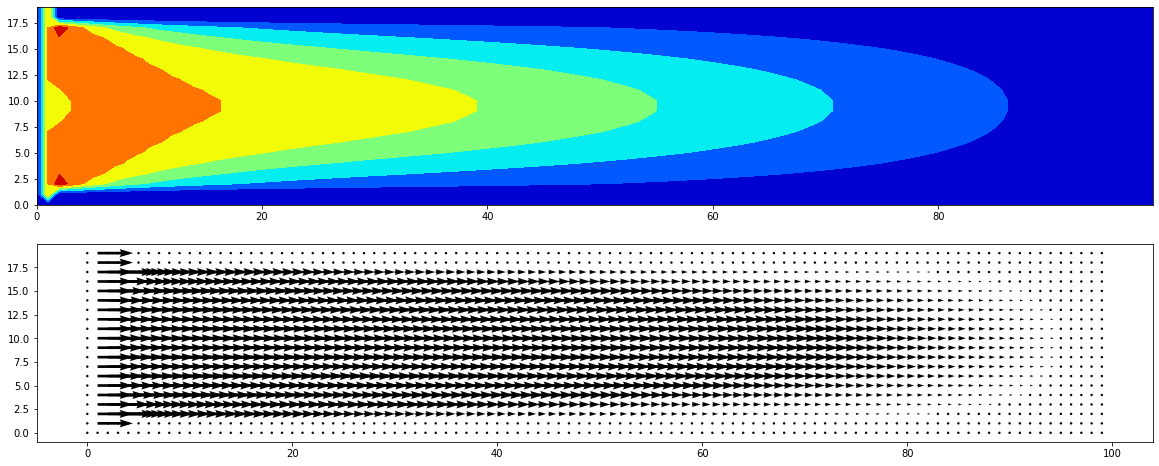

In [ ]:
fig = plt.figure(1,figsize=(20,8))
plt.subplot(211)
plt.contourf(U[:,:,int(0.99*nt)],cmap='jet')
plt.subplot(212)
plt.quiver(U[:,:,int(0.99*nt)],V[:,:,int(0.99*nt)])

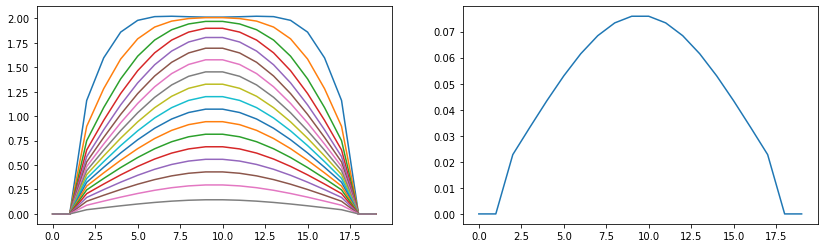

In [ ]:
fig = plt.figure(1,figsize=(14,4))
plt.subplot(121)
plt.plot(U[:,10:100:5,-2])
plt.subplot(122)
plt.plot(U[:,-3,-2]);

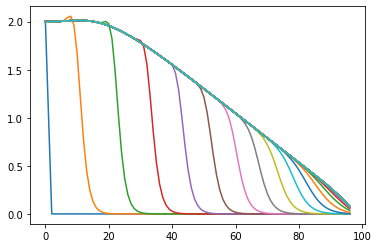

In [ ]:
plt.plot(U[10,1:-2,0:500:10]);